# US Census Income 

Problem Statement:
---
***
Prediction task is to determine the income level for the person represented by the record. Incomes have been binned at the $50K level to present a binary classification problem.  

***

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

In [ ]:
def set_display_option():
    pd.options.display.max_columns = 50
    pd.options.display.max_colwidth = 3
    pd.options.display.precision = 2
    
set_display_option()

## Let's start with Exploratory Data Analysis

In [ ]:
data = pd.read_csv("data/census-income.data",header=None, na_values=[" ?"])
test_data = pd.read_csv("data/census-income.test",header=None, na_values=[" ?"])

In [ ]:
data.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Not in labor force,0,0,0,Nonfiler,Not in universe,Not in universe,Other Rel 18+ ever marr not in subfamily,Other relative of householder,1700.09,NaN,NaN,NaN,Not in universe under 1 year old,NaN,0,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,- 50000.
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,White,All other,Male,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Head of household,South,Arkansas,Householder,Householder,1053.55,MSA to MSA,Same county,Same county,No,Yes,1,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,Asian or Pacific Islander,All other,Female,Not in universe,Not in universe,Not in labor force,0,0,0,Nonfiler,Not in universe,Not in universe,Child 18+ never marr Not in a subfamily,Child 18 or older,991.95,NaN,NaN,NaN,Not in universe under 1 year old,NaN,0,Not in universe,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,- 50000.


In [ ]:
test_data.head(3)

In [ ]:
column_names = ['AAGE', 'ACLSWKR', 'ADTIND', 'ADTOCC', 'AHGA', 'AHRSPAY', 'AHSCOL', 'AMARITL', 'AMJIND', 'AMJOCC', 'ARACE',
               'AREORGN', 'ASEX', 'AUNMEM', 'AUNTYPE', 'AWKSTAT', 'CAPGAIN', 'CAPLOSS', 'DIVVAL', 'FEDTAX', 'GRINREG', 'GRINST',
               'HHDFMX', 'HHDREL', 'MARSUPWT', 'MIGMTR1', 'MIGMTR3', 'MIGMTR4', 'MIGSAME', 'MIGSUN', 'NOEMP', 'PARENT',
               'PEFNTVTY', 'PEMNTVTY', 'PENATVTY', 'PRCITSHP', 'SEOTR', 'VETQVA', 'VETYN', 'WKSWORK', 'YEAR', 'PTOTVAL']

data.columns = column_names
test_data.columns = column_names

In [ ]:
data.head(10)

,AAGE,ACLSWKR,ADTIND,ADTOCC,AHGA,AHRSPAY,AHSCOL,AMARITL,AMJIND,AMJOCC,ARACE,AREORGN,ASEX,AUNMEM,AUNTYPE,AWKSTAT,CAPGAIN,CAPLOSS,DIVVAL,FEDTAX,GRINREG,GRINST,HHDFMX,HHDREL,MARSUPWT,MIGMTR1,MIGMTR3,MIGMTR4,MIGSAME,MIGSUN,NOEMP,PARENT,PEFNTVTY,PEMNTVTY,PENATVTY,PRCITSHP,SEOTR,VETQVA,VETYN,WKSWORK,YEAR,PTOTVAL
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Not in labor force,0,0,0,Nonfiler,Not in universe,Not in universe,Other Rel 18+ ever marr not in subfamily,Other relative of householder,1700.09,NaN,NaN,NaN,Not in universe under 1 year old,NaN,0,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,- 50000.
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,White,All other,Male,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Head of household,South,Arkansas,Householder,Householder,1053.55,MSA to MSA,Same county,Same county,No,Yes,1,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,Asian or Pacific Islander,All other,Female,Not in universe,Not in universe,Not in labor force,0,0,0,Nonfiler,Not in universe,Not in universe,Child 18+ never marr Not in a subfamily,Child 18 or older,991.95,NaN,NaN,NaN,Not in universe under 1 year old,NaN,0,Not in universe,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,- 50000.
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Nonfiler,Not in universe,Not in universe,Child <18 never marr not in subfamily,Child under 18 never married,1758.14,Nonmover,Nonmover,Nonmover,Yes,Not in universe,0,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Nonfiler,Not in universe,Not in universe,Child <18 never marr not in subfamily,Child under 18 never married,1069.16,Nonmover,Nonmover,Nonmover,Yes,Not in universe,0,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
5,48,Private,40,10,Some college but no degree,1200,Not in universe,Married-civilian spouse present,Entertainment,Professional specialty,Amer Indian Aleut or Eskimo,All other,Female,No,Not in universe,Full-time schedules,0,0,0,Joint both under 65,Not in universe,Not in universe,Spouse of householder,Spouse of householder,162.61,NaN,NaN,NaN,Not in universe under 1 year old,NaN,1,Not in universe,Philippines,United-States,United-States,Native- Born in the United States,2,Not in universe,2,52,95,- 50000.
6,42,Private,34,3,Bachelors degree(BA AB BS),0,Not in universe,Married-civilian spouse present,Finance insurance and real estate,Executive admin and managerial,White,All other,Male,Not in universe,Not in universe,Children or Armed Forces,5178,0,0,Joint both under 65,Not in universe,Not in universe,Householder,Householder,1535.86,Nonmover,Nonmover,Nonmover,Yes,Not in universe,6,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.
7,28,Private,4,40,High school graduate,0,Not in universe,Never married,Construction,Handlers equip cleaners etc,White,All other,Female,Not in universe,Job loser - on layoff,Unemployed full-time,0,0,0,Single,Not in universe,Not in universe,Secondary individual,Nonrel

In [ ]:
test_data.head(10)

,AAGE,ACLSWKR,ADTIND,ADTOCC,AHGA,AHRSPAY,AHSCOL,AMARITL,AMJIND,AMJOCC,ARACE,AREORGN,ASEX,AUNMEM,AUNTYPE,AWKSTAT,CAPGAIN,CAPLOSS,DIVVAL,FEDTAX,GRINREG,GRINST,HHDFMX,HHDREL,MARSUPWT,MIGMTR1,MIGMTR3,MIGMTR4,MIGSAME,MIGSUN,NOEMP,PARENT,PEFNTVTY,PEMNTVTY,PENATVTY,PRCITSHP,SEOTR,VETQVA,VETYN,WKSWORK,YEAR,PTOTVAL
0,38,Private,6,36,1st 2nd 3rd or 4th grade,0,Not in universe,Married-civilian spouse present,Manufacturing-durable goods,Machine operators assmblrs & inspctrs,White,Mexican (Mexicano),Female,Not in universe,Not in universe,Full-time schedules,0,0,0,Joint one under 65 & one 65+,Not in universe,Not in universe,Spouse of householder,Spouse of householder,1032.38,NaN,NaN,NaN,Not in universe under 1 year old,NaN,4,Not in universe,Mexico,Mexico,Mexico,Foreign born- Not a citizen of U S,0,Not in universe,2,12,95,- 50000.
1,44,Self-employed-not incorporated,37,12,Associates degree-occup /vocational,0,Not in universe,Married-civilian spouse present,Business and repair services,Professional specialty,White,All other,Female,Not in universe,Not in universe,PT for econ reasons usually PT,0,0,2500,Joint both under 65,Not in universe,Not in universe,Spouse of householder,Spouse of householder,1462.33,NaN,NaN,NaN,Not in universe under 1 year old,NaN,1,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,26,95,- 50000.
2,2,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,White,Mexican-American,Male,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Nonfiler,Not in universe,Not in universe,Child <18 never marr not in subfamily,Child under 18 never married,1601.75,NaN,NaN,NaN,Not in universe under 1 year old,NaN,0,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,95,- 50000.
3,35,Private,29,3,High school graduate,0,Not in universe,Divorced,Transportation,Executive admin and managerial,White,All other,Female,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Head of household,Not in universe,Not in universe,Householder,Householder,1866.88,Nonmover,Nonmover,Nonmover,Yes,Not in universe,5,Not in universe,United-States,United-States,United-States,Native- Born in the United States,2,Not in universe,2,52,94,- 50000.
4,49,Private,4,34,High school graduate,0,Not in universe,Divorced,Construction,Precision production craft & repair,White,All other,Male,Not in universe,Not in universe,Full-time schedules,0,0,0,Single,Not in universe,Not in universe,Secondary individual,Nonrelative of householder,1394.54,NaN,NaN,NaN,Not in universe under 1 year old,NaN,4,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,50,95,- 50000.
5,13,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Male,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Nonfiler,Not in universe,Not in universe,Child <18 never marr not in subfamily,Child under 18 never married,2556.34,Nonmover,Nonmover,Nonmover,Yes,Not in universe,0,Both parents present,Germany,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
6,1,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,White,Mexican-American,Female,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Nonfiler,Not in universe,Not in universe,Child <18 never marr not in subfamily,Child under 18 never married,1723.61,Nonmover,Nonmover,Nonmover,Yes,Not in universe,0,Both parents present,Mexico,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
7,61,Not in universe,0,0,High school graduate,0,Not in universe,Married-civilian spouse present,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Not in labor force,0,0,0

## Checking for the Duplicate values and removing them

In [ ]:
datadp = data[data.duplicated()]
datadp.head()

,AAGE,ACLSWKR,ADTIND,ADTOCC,AHGA,AHRSPAY,AHSCOL,AMARITL,AMJIND,AMJOCC,ARACE,AREORGN,ASEX,AUNMEM,AUNTYPE,AWKSTAT,CAPGAIN,CAPLOSS,DIVVAL,FEDTAX,GRINREG,GRINST,HHDFMX,HHDREL,MARSUPWT,MIGMTR1,MIGMTR3,MIGMTR4,MIGSAME,MIGSUN,NOEMP,PARENT,PEFNTVTY,PEMNTVTY,PENATVTY,PRCITSHP,SEOTR,VETQVA,VETYN,WKSWORK,YEAR,PTOTVAL
2784,11,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Nonfiler,Not in universe,Not in universe,Child <18 never marr not in subfamily,Child under 18 never married,1008.22,Nonmover,Nonmover,Nonmover,Yes,Not in universe,0,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
4967,4,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Male,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Nonfiler,Not in universe,Not in universe,Child <18 never marr not in subfamily,Child under 18 never married,1895.32,NaN,NaN,NaN,Not in universe under 1 year old,NaN,0,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,95,- 50000.
5175,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Nonfiler,Not in universe,Not in universe,Child <18 never marr not in subfamily,Child under 18 never married,896.96,Nonmover,Nonmover,Nonmover,Yes,Not in universe,0,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
5728,12,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Nonfiler,Not in universe,Not in universe,Child <18 never marr not in subfamily,Child under 18 never married,960.76,NaN,NaN,NaN,Not in universe under 1 year old,NaN,0,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,95,- 50000.
5935,0,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Male,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Nonfiler,Not in universe,Not in universe,Child <18 never marr not in subfamily,Child under 18 never married,1898.59,Not in universe,Not in universe,Not in universe,Not in universe under 1 year old,Not in universe,0,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.


In [ ]:
data.drop_duplicates(keep = "first", inplace = True)

In [ ]:
test_datadp = test_data[test_data.duplicated()]
test_datadp.head()

,AAGE,ACLSWKR,ADTIND,ADTOCC,AHGA,AHRSPAY,AHSCOL,AMARITL,AMJIND,AMJOCC,ARACE,AREORGN,ASEX,AUNMEM,AUNTYPE,AWKSTAT,CAPGAIN,CAPLOSS,DIVVAL,FEDTAX,GRINREG,GRINST,HHDFMX,HHDREL,MARSUPWT,MIGMTR1,MIGMTR3,MIGMTR4,MIGSAME,MIGSUN,NOEMP,PARENT,PEFNTVTY,PEMNTVTY,PENATVTY,PRCITSHP,SEOTR,VETQVA,VETYN,WKSWORK,YEAR,PTOTVAL
6199,70,Not in universe,0,0,1st 2nd 3rd or 4th grade,0,Not in universe,Married-civilian spouse present,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Nonfiler,Not in universe,Not in universe,Spouse of householder,Spouse of householder,993.86,Nonmover,Nonmover,Nonmover,Yes,Not in universe,0,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,94,- 50000.
6327,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Male,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Nonfiler,Not in universe,Not in universe,Child <18 never marr not in subfamily,Child under 18 never married,285.27,NaN,NaN,NaN,Not in universe under 1 year old,NaN,0,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,95,- 50000.
6535,13,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Nonfiler,Not in universe,Not in universe,Child <18 never marr not in subfamily,Child under 18 never married,4714.56,NaN,NaN,NaN,Not in universe under 1 year old,NaN,0,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,95,- 50000.
7920,3,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Nonfiler,Not in universe,Not in universe,Child <18 never marr not in subfamily,Child under 18 never married,576.75,NaN,NaN,NaN,Not in universe under 1 year old,NaN,0,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,95,- 50000.
8262,6,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Nonfiler,Not in universe,Not in universe,Child <18 never marr not in subfamily,Child under 18 never married,1528.37,NaN,NaN,NaN,Not in universe under 1 year old,NaN,0,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,95,- 50000.


In [ ]:
test_data.drop_duplicates(keep = "first", inplace = True)

In [ ]:
def print_nullval(data):
    for column in data.columns:
        print(column, "-->", round(data[column].isnull().sum()/len(data)*100,2))
        
def print_details(data):
    print("\n","=====Shape=====","\n")
    print("Shape: ",data.shape)
    print("\n","=====Data Types======","\n")
    print(data.dtypes)
#     print("\n","=====NA Values======","\n")
#     print(data.isna().sum())
    print("\nTotal Na values: ",data.isna().sum().sum())
    print("\n","=====NULL Values======","\n")
    print(data.isnull().sum())
    print("\nTotal Null values",data.isnull().sum().sum(),"\n")
    if data.isnull().sum().sum() > 0:
        print_nullval(data)

In [ ]:
print("=====Train Data====")
print_details(data)
print("\n=====Test Data====")
print_details(test_data)

=====Train Data====

 =====Shape===== 

Shape:  (196294, 42)

 =====Data Types====== 

AAGE        int64  
ACLSWKR     object 
ADTIND      int64  
ADTOCC      int64  
AHGA        object 
AHRSPAY     int64  
AHSCOL      object 
AMARITL     object 
AMJIND      object 
AMJOCC      object 
ARACE       object 
AREORGN     object 
ASEX        object 
AUNMEM      object 
AUNTYPE     object 
AWKSTAT     object 
CAPGAIN     int64  
CAPLOSS     int64  
DIVVAL      int64  
FEDTAX      object 
GRINREG     object 
GRINST      object 
HHDFMX      object 
HHDREL      object 
MARSUPWT    float64
MIGMTR1     object 
MIGMTR3     object 
MIGMTR4     object 
MIGSAME     object 
MIGSUN      object 
NOEMP       int64  
PARENT      object 
PEFNTVTY    object 
PEMNTVTY    object 
PENATVTY    object 
PRCITSHP    object 
SEOTR       int64  
VETQVA      object 
VETYN       int64  
WKSWORK     int64  
YEAR        int64  
PTOTVAL     object 
dtype: object

Total Na values:  408966

 =====NULL Values====== 

AAGE  

In [ ]:
cat_cols = data.select_dtypes(include=["object"]).columns
num_cols = data.columns[~data.columns.isin(cat_cols)]

def print_details2(data):
    print("\n=====Columns======\n")
    print(data.columns)
    print("\n=====Numnerical Columns======\n")
    print(num_cols)
    print("\n=====Categorical Columns======\n")
    print(cat_cols)

In [ ]:
print("=====Train Data====")
print_details2(data)
print("\n=====Test Data====")
print_details2(test_data)

=====Train Data====

=====Columns======

Index(['AAGE', 'ACLSWKR', 'ADTIND', 'ADTOCC', 'AHGA', 'AHRSPAY', 'AHSCOL',
       'AMARITL', 'AMJIND', 'AMJOCC', 'ARACE', 'AREORGN', 'ASEX', 'AUNMEM',
       'AUNTYPE', 'AWKSTAT', 'CAPGAIN', 'CAPLOSS', 'DIVVAL', 'FEDTAX',
       'GRINREG', 'GRINST', 'HHDFMX', 'HHDREL', 'MARSUPWT', 'MIGMTR1',
       'MIGMTR3', 'MIGMTR4', 'MIGSAME', 'MIGSUN', 'NOEMP', 'PARENT',
       'PEFNTVTY', 'PEMNTVTY', 'PENATVTY', 'PRCITSHP', 'SEOTR', 'VETQVA',
       'VETYN', 'WKSWORK', 'YEAR', 'PTOTVAL'],
      dtype='object')

=====Numnerical Columns======

Index(['AAGE', 'ADTIND', 'ADTOCC', 'AHRSPAY', 'CAPGAIN', 'CAPLOSS', 'DIVVAL',
       'MARSUPWT', 'NOEMP', 'SEOTR', 'VETYN', 'WKSWORK', 'YEAR'],
      dtype='object')

=====Categorical Columns======

Index(['ACLSWKR', 'AHGA', 'AHSCOL', 'AMARITL', 'AMJIND', 'AMJOCC', 'ARACE',
       'AREORGN', 'ASEX', 'AUNMEM', 'AUNTYPE', 'AWKSTAT', 'FEDTAX', 'GRINREG',
       'GRINST', 'HHDFMX', 'HHDREL', 'MIGMTR1', 'MIGMTR3', 'MIGMTR4'

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
AAGE,196294.0,34.93,22.21,0.00,16.00,34.00,50.00,90.0
ADTIND,196294.0,15.60,18.11,0.00,0.00,1.00,33.00,51.0
ADTOCC,196294.0,11.49,14.50,0.00,0.00,2.00,26.00,46.0
AHRSPAY,196294.0,56.34,277.05,0.00,0.00,0.00,0.00,9999.0
CAPGAIN,196294.0,441.87,4735.68,0.00,0.00,0.00,0.00,99999.0
CAPLOSS,196294.0,37.93,274.08,0.00,0.00,0.00,0.00,4608.0
DIVVAL,196294.0,200.72,2000.13,0.00,0.00,0.00,0.00,99999.0
MARSUPWT,196294.0,1743.27,996.95,37.87,1061.53,1620.18,2194.06,18656.3
NOEMP,196294.0,1.99,2.37,0.00,0.00,1.00,4.00,6.0
SEOTR,196294.0,0.18,0.56,0.00,0.00,0.00,0.00,2.0


In [ ]:
test_data.describe().T

,count,mean,std,min,25%,50%,75%,max
AAGE,98879.0,34.87,22.28,0.00,16.00,33.00,50.00,90.0
ADTIND,98879.0,15.47,18.05,0.00,0.00,1.00,33.00,51.0
ADTOCC,98879.0,11.43,14.48,0.00,0.00,1.00,26.00,46.0
AHRSPAY,98879.0,54.95,271.36,0.00,0.00,0.00,0.00,9900.0
CAPGAIN,98879.0,429.59,4637.19,0.00,0.00,0.00,0.00,99999.0
CAPLOSS,98879.0,36.24,266.69,0.00,0.00,0.00,0.00,4608.0
DIVVAL,98879.0,194.21,1849.84,0.00,0.00,0.00,0.00,99999.0
MARSUPWT,98879.0,1741.22,996.25,43.26,1058.14,1616.89,2190.47,16258.2
NOEMP,98879.0,1.97,2.37,0.00,0.00,1.00,4.00,6.0
SEOTR,98879.0,0.18,0.56,0.00,0.00,0.00,0.00,2.0


In [ ]:
for x in cat_cols:
    print("\n",x,"------>",data[x].unique())


 ACLSWKR ------> [' Not in universe' ' Self-employed-not incorporated' ' Private'
 ' Local government' ' Federal government' ' Self-employed-incorporated'
 ' State government' ' Never worked' ' Without pay']

 AHGA ------> [' High school graduate' ' Some college but no degree' ' 10th grade'
 ' Children' ' Bachelors degree(BA AB BS)'
 ' Masters degree(MA MS MEng MEd MSW MBA)' ' Less than 1st grade'
 ' Associates degree-academic program' ' 7th and 8th grade'
 ' 12th grade no diploma' ' Associates degree-occup /vocational'
 ' Prof school degree (MD DDS DVM LLB JD)' ' 5th or 6th grade'
 ' 11th grade' ' Doctorate degree(PhD EdD)' ' 9th grade'
 ' 1st 2nd 3rd or 4th grade']

 AHSCOL ------> [' Not in universe' ' High school' ' College or university']

 AMARITL ------> [' Widowed' ' Divorced' ' Never married'
 ' Married-civilian spouse present' ' Separated' ' Married-spouse absent'
 ' Married-A F spouse present']

 AMJIND ------> [' Not in universe or children' ' Construction' ' Entertainment

 VETQVA ------> [' Not in universe' ' No' ' Yes']

 PTOTVAL ------> [' - 50000.' ' 50000+.']


# Preprocessing

## Dropping Coluns which have 50% null values

In [ ]:
data.drop(columns = ["MIGMTR1","MIGMTR3","MIGMTR4","MIGSUN"], axis = 1, inplace = True)
test_data.drop(columns = ["MIGMTR1","MIGMTR3","MIGMTR4","MIGSUN"], axis = 1, inplace = True)

NameError: ignored

**From the above Analysis we can see that the automated code didn't filter all the categorical columns in our data**

In [ ]:
cat_cols = ['ACLSWKR', 'AHGA', 'AHSCOL', 'AMARITL', 'AMJIND', 'AMJOCC', 'ARACE',
            'AREORGN', 'ASEX', 'AUNMEM', 'AUNTYPE', 'AWKSTAT', 'FEDTAX', 'GRINREG',
            'GRINST', 'HHDFMX', 'HHDREL','MIGSAME', 'PARENT', 'PEFNTVTY', 'PEMNTVTY', 'PENATVTY',
            'PRCITSHP', 'VETQVA', 'PTOTVAL', 'ADTIND', 'ADTOCC', 'NOEMP', 'SEOTR', 'VETYN', 'YEAR']
num_cols = data.columns[~data.columns.isin(cat_cols)]
data[cat_cols] = data[cat_cols].astype("category")
test_data[cat_cols] = test_data[cat_cols].astype("category")

NameError: ignored

In [ ]:
print_details2(data)

In [ ]:
def train_imputation():
    c = ["GRINST","PEFNTVTY", "PEMNTVTY", "PENATVTY"]
    cat_imputer = SimpleImputer(strategy="most_frequent")
    cat_imputer.fit(data[c])
    data[c] = cat_imputer.transform(data[c])

In [ ]:
def test_imputation():
    c = ["GRINST","PEFNTVTY", "PEMNTVTY", "PENATVTY"]
    cat_imputer = SimpleImputer(strategy="most_frequent")
    cat_imputer.fit(test_data[c])
    test_data[c] = cat_imputer.transform(test_data[c])

**Converting PTOTVAL column into categorical columns** 

In [ ]:
data.PTOTVAL = data.PTOTVAL.astype("category").cat.codes
test_data.PTOTVAL = test_data.PTOTVAL.astype("category").cat.codes

**Proceeding with Simple Imputation**

In [ ]:
train_imputation()
print("Total Na values in Train Data: ",data.isnull().sum().sum())

In [ ]:
test_imputation()
print("Total Na values in Test Data: ",test_data.isnull().sum().sum())

## Visualization

<div class="alert alert-block alert-info"><b>
    Data Visualization has been done in <i>Tableau</i>.<br>
    Kindly Open the file by clicking <a href = "Census Dashboard.twb">here</a>
</b></div>

In [ ]:
f, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.countplot(x = data['PTOTVAL'], ax=axes[0])
sns.heatmap(data.corr(), annot = True, cmap = "Greens", fmt = ".1f", ax=axes[1])

>**We have a class imbalance problem and Numerical attribute don't contribute much to the Target variable**

**We'll create a new Variable AAGEBIN to bin AGE into categories

In [ ]:
data["AAGEBIN"] = pd.cut(x = data["AAGE"],bins = [-1,18,30,45,60,95],labels = ["Young", "Adult", "Middle Age","Old","Very Old" ])
data.drop("AAGE",axis = 1, inplace = True)

In [ ]:
test_data["AAGEBIN"] = pd.cut(x = test_data["AAGE"],bins = [-1,18,30,45,60,95],labels = ["Young", "Adult", "Middle Age","Old","Very Old" ])
test_data.drop("AAGE",axis = 1, inplace = True)

# Train-Test Split

In [ ]:
X = data.drop('PTOTVAL', axis = 1)
y = data['PTOTVAL']

In [ ]:
from sklearn.model_selection import train_test_split

def prepare_data(X, y, split_size = 0.3) :
    
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = split_size)  

    print(X_train.shape)
    print(X_val.shape)
    
    return X_train, X_val, y_train, y_val

In [ ]:
X_train, X_val, y_train, y_val = prepare_data(X, y, 0.3)

(137405, 37)
(58889, 37)


In [ ]:
cat_cols = ['ACLSWKR', 'AHGA', 'AHSCOL', 'AMARITL', 'AMJIND', 'AMJOCC', 'ARACE',
            'AREORGN', 'ASEX', 'AUNMEM', 'AUNTYPE', 'AWKSTAT', 'FEDTAX', 'GRINREG',
            'GRINST', 'HHDFMX', 'HHDREL','MIGSAME', 'PARENT', 'PEFNTVTY', 
            'PEMNTVTY', 'PENATVTY','PRCITSHP', 'VETQVA',"AAGEBIN"]

**We'll proceed with Dumifiation as of now since We'll apply Decision Tree Classifier to know feature importance**

In [ ]:
X_train = pd.get_dummies(X_train, columns = cat_cols, drop_first = True)
X_val = pd.get_dummies(X_val, columns = cat_cols, drop_first = True)

## Model Building

In [ ]:
from sklearn.model_selection import GridSearchCV

def model_building(X, y, val, model, params = None, k = 1) :
    
    if params == None :
        model.fit(X, y)
        
        # return fitted model & train-val predictions
        return (model, model.predict(X), model.predict(val))
    
    else :
        model_cv = GridSearchCV(model, param_grid = params, cv = k)
        model_cv.fit(X, y)
        model = model_cv
        
        
        # return and extra object for all cross validation operations
        return (model_cv, model, model.predict(X), model.predict(val))

In [ ]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
from sklearn.metrics import f1_score

def model_evaluation(y_train, pred_train, y_test, pred_test) :
    
    print('''
            =========================================
               CLASSIFICATION REPORT FOR TRAIN DATA
            =========================================''')
    print(classification_report(y_train, pred_train))
    print("f1_score: ",f1_score(y_train, pred_train))
    print('\nConfusion Matrix :')
    print(confusion_matrix(y_train, pred_train) )
    print('\nAccuracy Score :', accuracy_score(y_train, pred_train)) 
    print("------------------------------------------------------------------")
    
    print('''
            =========================================
               CLASSIFICATION REPORT FOR Validation DATA
            =========================================''')
    print(classification_report(y_test, pred_test))
    print("f1_score: ", f1_score(y_test, pred_test))
    print('\nConfusion Matrix :')
    print(confusion_matrix(y_test, pred_test) ) 
    print('\nAccuracy Score :', accuracy_score(y_test, pred_test)) 
    print("------------------------------------------------------------------")

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model, pred_train, pred_val = model_building(X_train, y_train, X_val, DecisionTreeClassifier())

In [ ]:
model_evaluation(y_train, pred_train, y_val, pred_val)


               CLASSIFICATION REPORT FOR TRAIN DATA
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    128806
           1       1.00      1.00      1.00      8599

    accuracy                           1.00    137405
   macro avg       1.00      1.00      1.00    137405
weighted avg       1.00      1.00      1.00    137405

f1_score:  0.9999418503227308

Confusion Matrix :
[[128806      0]
 [     1   8598]]

Accuracy Score : 0.9999927222444598
------------------------------------------------------------------

               CLASSIFICATION REPORT FOR Validation DATA
              precision    recall  f1-score   support

           0       0.96      0.96      0.96     55106
           1       0.45      0.48      0.47      3783

    accuracy                           0.93     58889
   macro avg       0.71      0.72      0.71     58889
weighted avg       0.93      0.93      0.93     58889

f1_score:  0.46759912742204546

Confusion Matr

In [ ]:
importance = pd.DataFrame([model.feature_importances_], columns = X_train.columns)
importance.sort_values(by = 0, axis = 1, ascending = False, inplace = True)

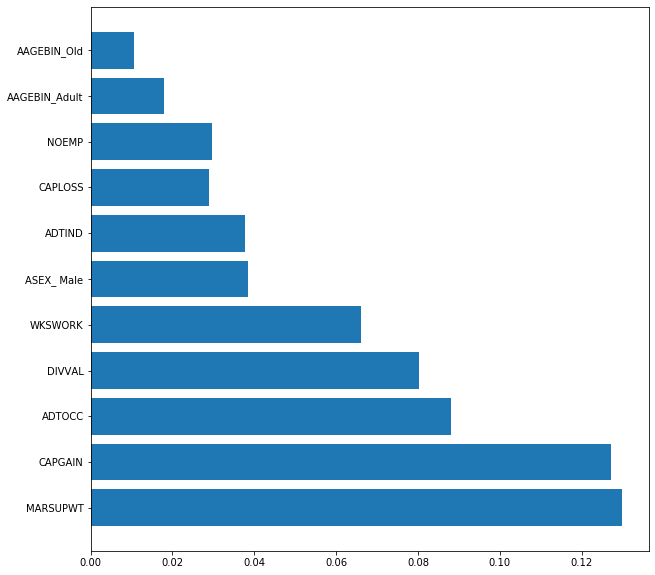

In [ ]:
plt.rcParams["figure.figsize"] = 10,10
plt.barh(importance.columns[0:11],importance.loc[0,['MARSUPWT', 'CAPGAIN', 'ADTOCC', 'DIVVAL',
                                                    'WKSWORK', 'ASEX_ Male', 'ADTIND', 'NOEMP', 'CAPLOSS',
                                                    'AAGEBIN_Adult', 'SEOTR']].values) 
plt.show()

**Let's try with vanila Bagging Classifier**

In [ ]:
from sklearn.ensemble import BaggingClassifier
model1, pred_train, pred_val = model_building(X_train, y_train, X_val, BaggingClassifier())

In [ ]:
model_evaluation(y_train, pred_train, y_val, pred_val)


               CLASSIFICATION REPORT FOR TRAIN DATA
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    128806
           1       0.99      0.92      0.95      8599

    accuracy                           0.99    137405
   macro avg       0.99      0.96      0.97    137405
weighted avg       0.99      0.99      0.99    137405

f1_score:  0.9525710828796129

Confusion Matrix :
[[128748     58]
 [   726   7873]]

Accuracy Score : 0.9942942396564899
------------------------------------------------------------------

               CLASSIFICATION REPORT FOR Validation DATA
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     55106
           1       0.67      0.42      0.52      3783

    accuracy                           0.95     58889
   macro avg       0.82      0.70      0.75     58889
weighted avg       0.94      0.95      0.94     58889

f1_score:  0.5201298701298701

Confusion Matri

## Feature Engineering

**Let's Start with some feature engineering to reduce the number of columns**

In [ ]:
X = data.drop('PTOTVAL', axis = 1)
y = data['PTOTVAL']

In [ ]:
test_data.drop("PTOTVAL", axis = 1, inplace = True)

In [ ]:
def totinc(row):
    return ((((row["AHRSPAY"]*8)*5)*row["WKSWORK"])+row["CAPGAIN"]-row["CAPLOSS"])

In [ ]:
X["TOTINC"] = X.apply(totinc, axis = 1)
test_data["TOTINC"] = test_data.apply(totinc, axis = 1)

In [ ]:
X.drop(columns = ["AHRSPAY", "WKSWORK", "CAPGAIN","CAPLOSS"],inplace = True)
test_data.drop(columns = ["AHRSPAY", "WKSWORK", "CAPGAIN","CAPLOSS"],inplace = True)

**Checking the overall income distribution**

In [ ]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
DIVVAL,196294.0,200.72,2000.13,0.00,0.00,0.00,0.00,1.00e+05
MARSUPWT,196294.0,1743.27,996.95,37.87,1061.53,1620.18,2194.06,1.87e+04
TOTINC,196294.0,106019.75,541648.18,-4608.00,0.00,0.00,0.00,2.08e+07


In [ ]:
test_data.describe().T

,count,mean,std,min,25%,50%,75%,max
DIVVAL,98879.0,194.21,1849.84,0.00,0.00,0.00,0.00,1.00e+05
MARSUPWT,98879.0,1741.22,996.25,43.26,1058.14,1616.89,2190.47,1.63e+04
TOTINC,98879.0,103180.94,533681.15,-4608.00,0.00,0.00,0.00,2.06e+07


>**Distributig the total income into 3 categories**

In [ ]:
def cattotinc(row):
    if row["TOTINC"] < 0:
        return "Below 0"
    elif row["TOTINC"] > 0 and row["TOTINC"] < 50000:
        return "Below 50000"
    else:
        return "Above 50000"

In [ ]:
X["TOTINCAT"] = X.apply(cattotinc, axis = 1)
test_data["TOTINCAT"] = test_data.apply(cattotinc, axis = 1)

In [ ]:
X.TOTINCAT.value_counts()

Above 50000    186074
Below 50000    6568  
Below 0        3652  
Name: TOTINCAT, dtype: int64

In [ ]:
X.drop("TOTINC", axis = 1, inplace = True)
test_data.drop("TOTINC", axis = 1, inplace = True)

>**Distributing Worker class into further selective categories**

In [ ]:
def classworker(row):
    if row["ACLSWKR"] == ' Self-employed-not incorporated' or row["ACLSWKR"] == ' Private' or row["ACLSWKR"] == ' Self-employed-incorporated':
        return "Self Employed"
    elif row["ACLSWKR"] == ' Local government' or row["ACLSWKR"] == ' Federal government' or row["ACLSWKR"] == ' State government' :
        return "Government"
    else:
        return "Unemoloyed"

In [ ]:
X["WKRCLASS"] = X.apply(classworker, axis = 1)
test_data["WKRCLASS"] = test_data.apply(classworker, axis = 1)

In [ ]:
X.drop("ACLSWKR", axis = 1, inplace = True)
test_data.drop("ACLSWKR", axis = 1, inplace = True)

**Spliting, One hot encoding and Model building**

In [ ]:
X

,ADTIND,ADTOCC,AHGA,AHSCOL,AMARITL,AMJIND,AMJOCC,ARACE,AREORGN,ASEX,AUNMEM,AUNTYPE,AWKSTAT,DIVVAL,FEDTAX,GRINREG,GRINST,HHDFMX,HHDREL,MARSUPWT,MIGSAME,NOEMP,PARENT,PEFNTVTY,PEMNTVTY,PENATVTY,PRCITSHP,SEOTR,VETQVA,VETYN,YEAR,AAGEBIN,TOTINCAT,WKRCLASS
0,0,0,High school graduate,Not in universe,Widowed,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Not in labor force,0,Nonfiler,Not in universe,Not in universe,Other Rel 18+ ever marr not in subfamily,Other relative of householder,1700.09,Not in universe under 1 year old,0,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,95,Very Old,Above 50000,Unemoloyed
1,4,34,Some college but no degree,Not in universe,Divorced,Construction,Precision production craft & repair,White,All other,Male,Not in universe,Not in universe,Children or Armed Forces,0,Head of household,South,Arkansas,Householder,Householder,1053.55,No,1,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,94,Old,Above 50000,Self Employed
2,0,0,10th grade,High school,Never married,Not in universe or children,Not in universe,Asian or Pacific Islander,All other,Female,Not in universe,Not in universe,Not in labor force,0,Nonfiler,Not in universe,Not in universe,Child 18+ never marr Not in a subfamily,Child 18 or older,991.95,Not in universe under 1 year old,0,Not in universe,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,95,Young,Above 50000,Unemoloyed
3,0,0,Children,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Children or Armed Forces,0,Nonfiler,Not in universe,Not in universe,Child <18 never marr not in subfamily,Child under 18 never married,1758.14,Yes,0,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,94,Young,Above 50000,Unemoloyed
4,0,0,Children,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Children or Armed Forces,0,Nonfiler,Not in universe,Not in universe,Child <18 never marr not in subfamily,Child under 18 never married,1069.16,Yes,0,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,94,Young,Above 50000,Unemoloyed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199518,0,0,7th and 8th grade,Not in universe,Married-civilian spouse present,Not in universe or children,Not in universe,White,All other,Male,Not in universe,Not in universe,Not in labor force,0,Joint both 65+,Not in universe,Not in universe,Householder,Householder,955.27,Not in universe under 1 year old,0,Not in universe,Canada,United-States,United-States,Native- Born in the United States,0,Not in universe,2,95,Very Old,Above 50000,Unemoloyed
199519,37,2,11th grade,Not in universe,Married-civilian spouse present,Business and repair services,Executive admin and managerial,White,All other,Male,Not in universe,Not in universe,Children or Armed Forces,9,Joint one under 65 & one 65+,Not in universe,Not in universe,Householder,Householder,687.19,Yes,1,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,94,Very Old,Below 50000,Self Employed
199520,0,0,Some college but no degree,Not in universe,Married-civilian spouse present,Not in universe or children,Not in universe,White,All other,Male,Not in universe,Not in universe,Children or Armed Forces,157,Joint both under 65,Not in universe,Not in universe,Householder,Householder,1923.03,Not in universe under 1 year old,6,Not in universe,Poland,Poland,Germany,Foreign born- U S citizen by naturalization,0,Not in universe,2,95,Old,Above 50000,Unemoloyed
199521,0,0,10th grade,High sc

In [ ]:
X.columns

Index(['ADTIND', 'ADTOCC', 'AHGA', 'AHSCOL', 'AMARITL', 'AMJIND', 'AMJOCC',
       'ARACE', 'AREORGN', 'ASEX', 'AUNMEM', 'AUNTYPE', 'AWKSTAT', 'DIVVAL',
       'FEDTAX', 'GRINREG', 'GRINST', 'HHDFMX', 'HHDREL', 'MARSUPWT',
       'MIGSAME', 'NOEMP', 'PARENT', 'PEFNTVTY', 'PEMNTVTY', 'PENATVTY',
       'PRCITSHP', 'SEOTR', 'VETQVA', 'VETYN', 'YEAR', 'AAGEBIN', 'TOTINCAT',
       'WKRCLASS'],
      dtype='object')

In [ ]:
X_train, X_val, y_train, y_val = prepare_data(X, y, 0.3)

(137405, 34)
(58889, 34)


In [ ]:
cat_cols = ['AHGA', 'AHSCOL', 'AMARITL', 'AMJIND', 'AMJOCC', 'ARACE', 'AREORGN', 'ASEX', 'AUNMEM', 'AUNTYPE',
             'AWKSTAT', 'FEDTAX', 'GRINREG', 'GRINST', 'HHDFMX', 'HHDREL', 'MIGSAME', 'PARENT', 'PEFNTVTY', 'PEMNTVTY',
             'PENATVTY', 'PRCITSHP', 'VETQVA', 'AAGEBIN',
           "WKRCLASS","TOTINCAT" ]

In [ ]:
X_train = pd.get_dummies(X_train, columns = cat_cols, drop_first = True)

In [ ]:
X_val = pd.get_dummies(X_val, columns = cat_cols, drop_first = True)

In [ ]:
X_val.shape

(58889, 343)

In [ ]:
X_train.shape

(137405, 343)

from sklearn.preprocessing import OneHotEncoder
oh = OneHotEncoder(handle_unknown = "ignore", sparse = False)
X_train = oh.fit_transform(X_train[cat_cols])

X_val = oh.transform(X_val[cat_cols])